In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib as mlt 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

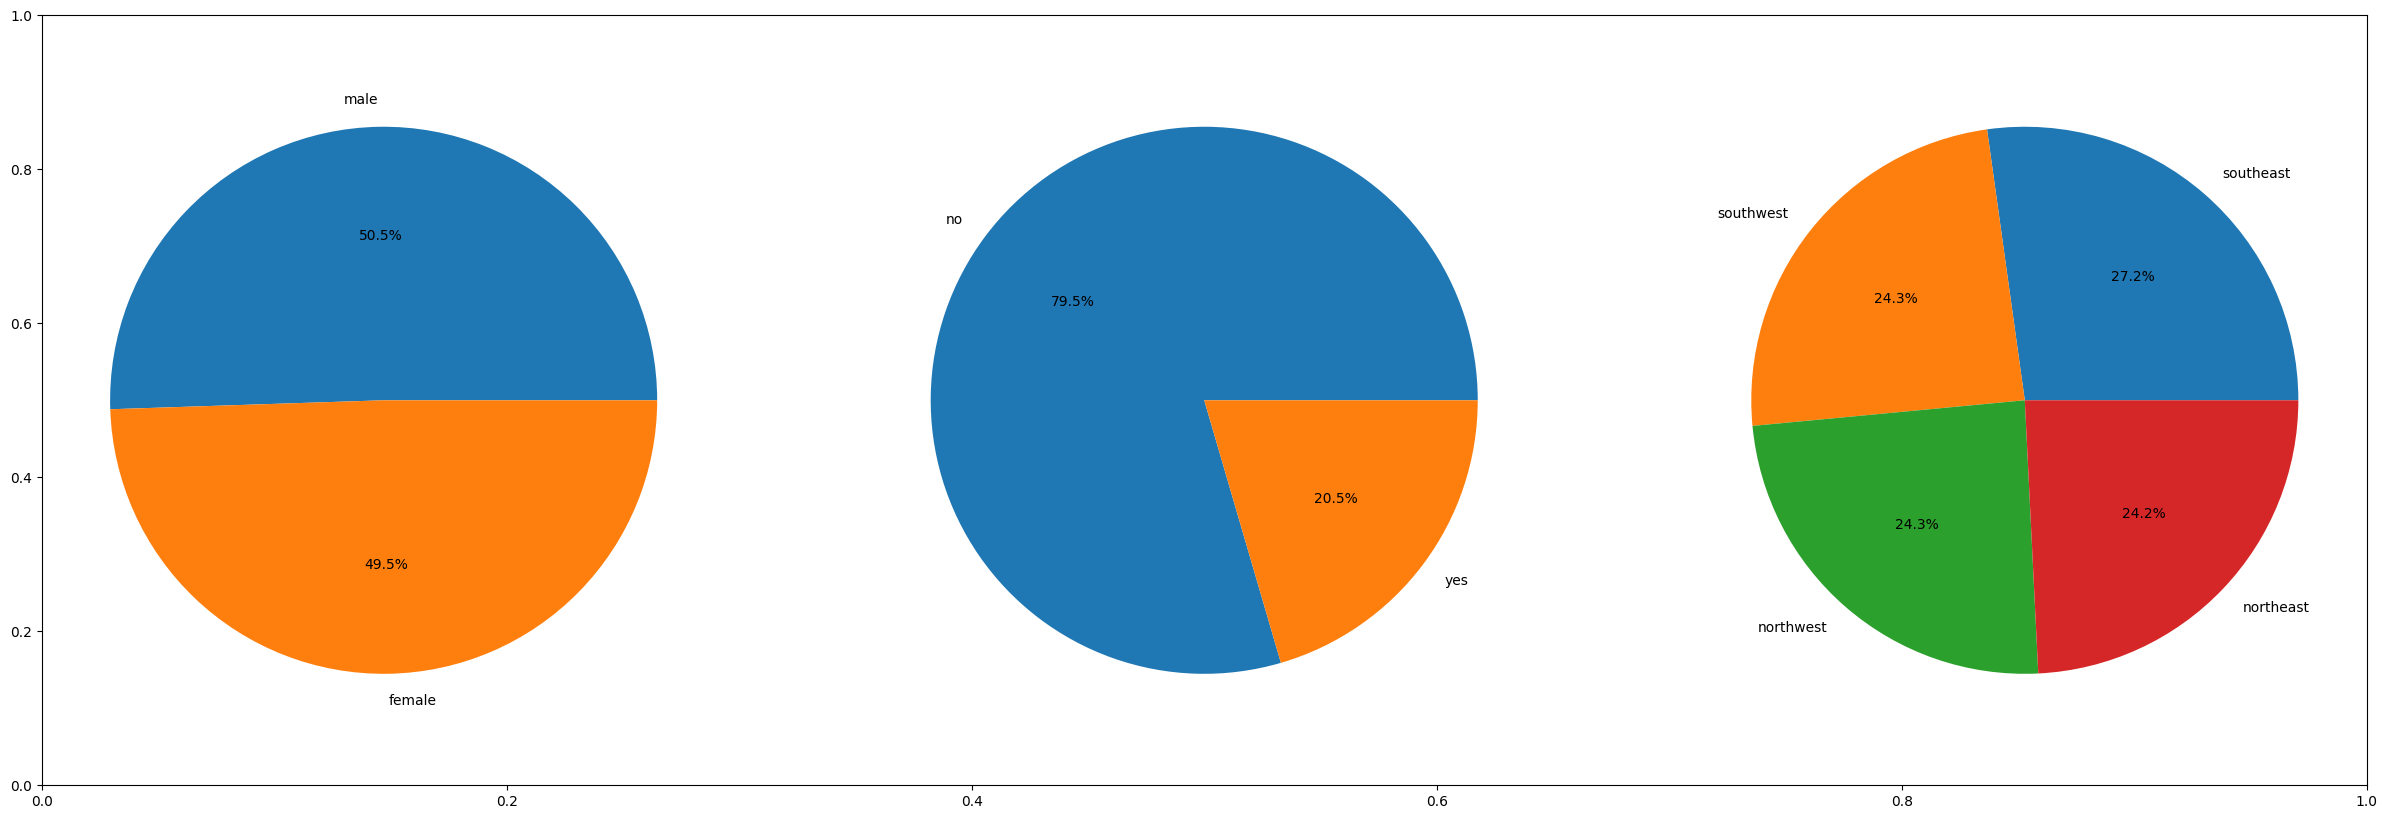

In [8]:
features = ['sex', 'smoker', 'region'] 

plt.subplots(figsize = (30, 10))
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)

    x = df[col].value_counts()
    plt.pie(x.values, labels = x.index, autopct='%1.1f%%')

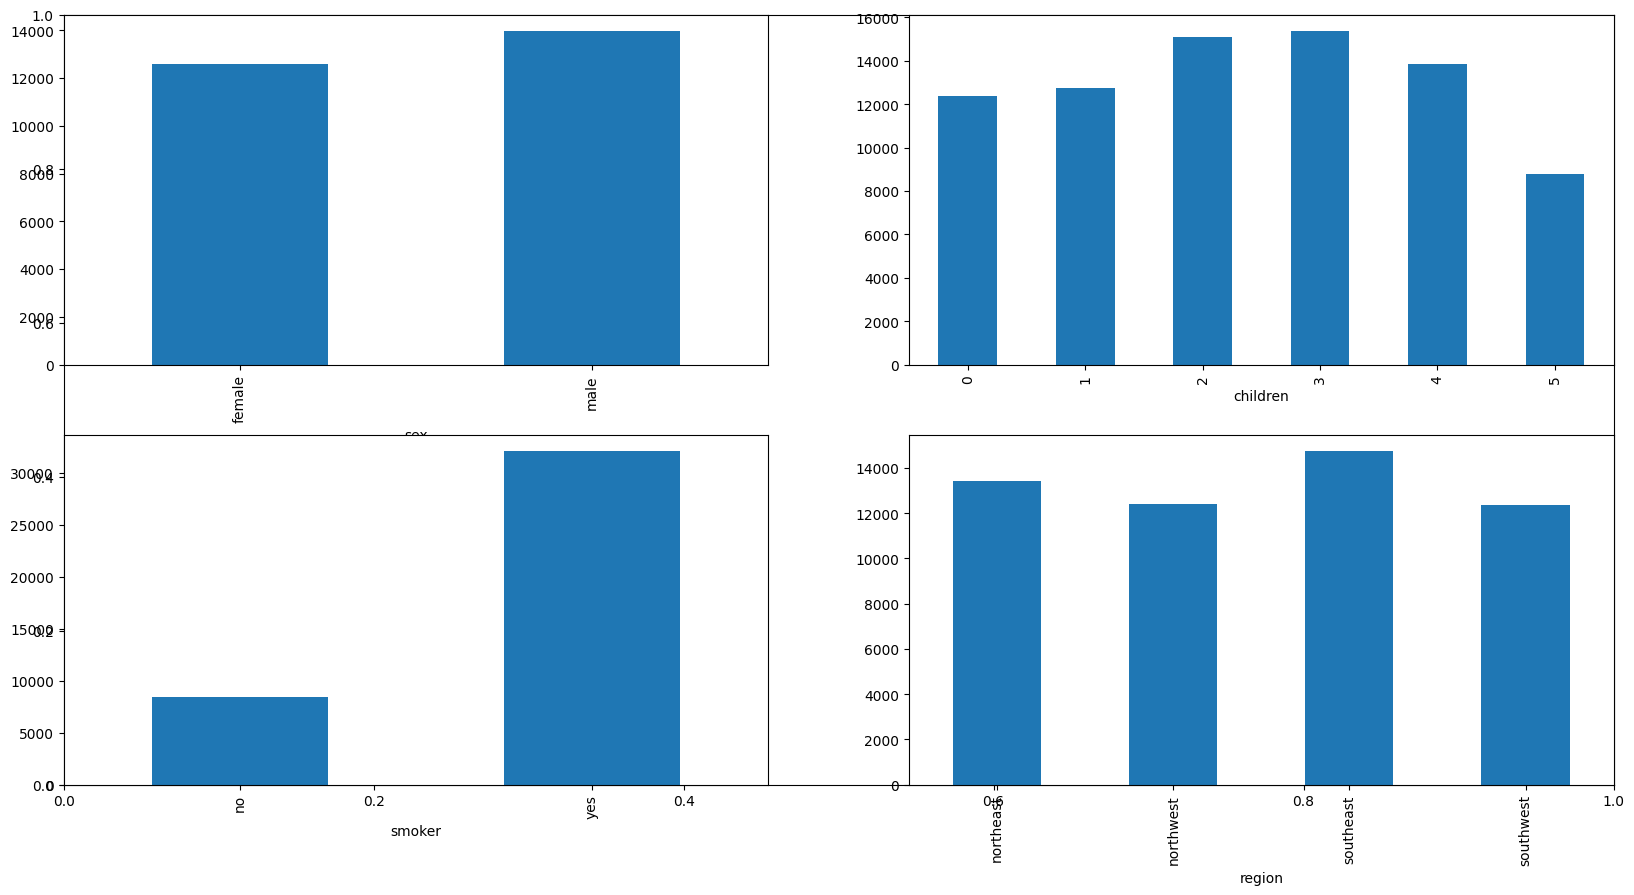

In [9]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

In [10]:
df1 = df.copy()

In [11]:
df1['sex']=df1['sex'].map({'male':0,'female':1})
df1['smoker']=df1['smoker'].map({'yes':1,'no':0})
df1['region']=df1['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [12]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [13]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [16]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

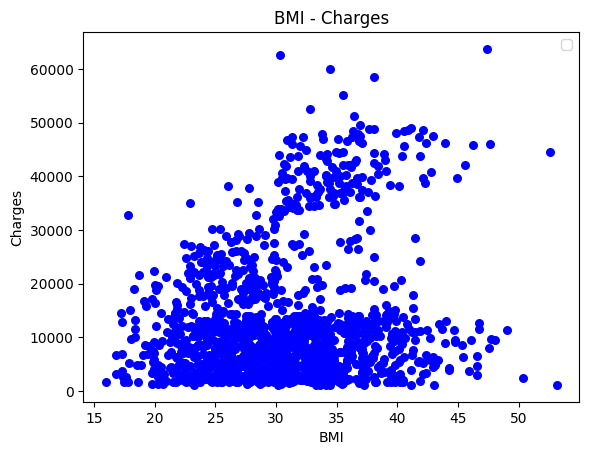

In [19]:
plt.scatter(df.bmi, df.charges, color='blue', s=30)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI - Charges")
plt.legend()
plt.show()

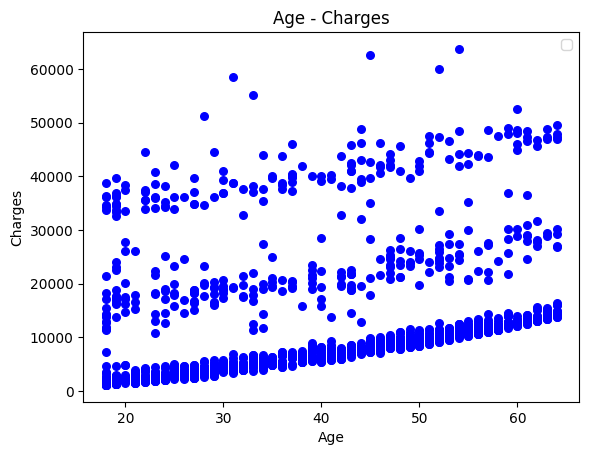

In [20]:
plt.scatter(df.age, df.charges, color='blue', s=30)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age - Charges")
plt.legend()
plt.show()

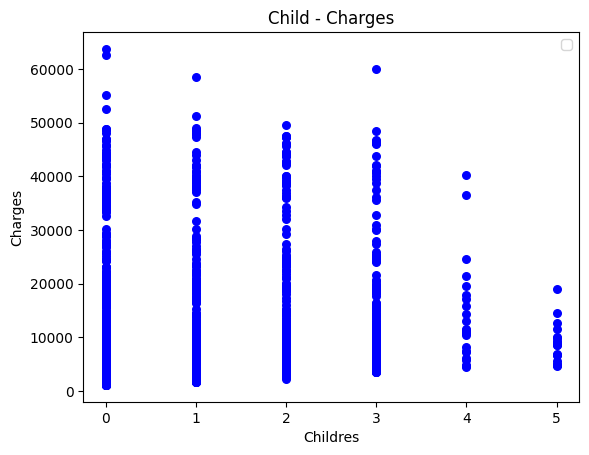

In [21]:
plt.scatter(df.children, df.charges, color='blue', s=30)
plt.xlabel("Childres")
plt.ylabel("Charges")
plt.title("Child - Charges")
plt.legend()
plt.show()

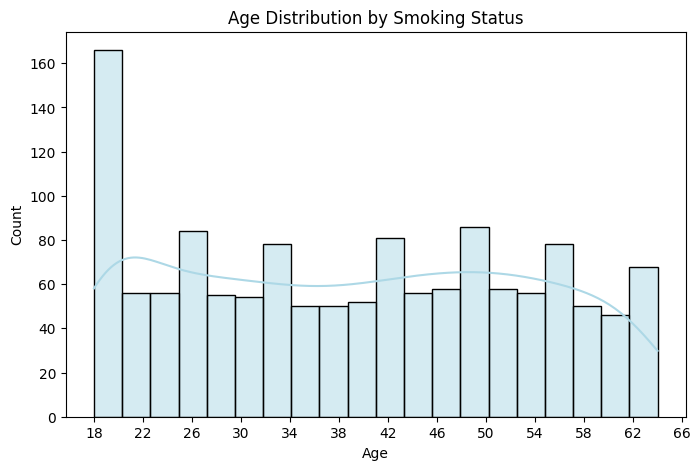

In [22]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df, x='age', bins=20,color="lightblue",kde=True)

plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')

plt.xticks(ticks=np.arange(df['age'].min(), df['age'].max()+4, step=4))


plt.show()

In [23]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [24]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<Axes: ylabel='age'>

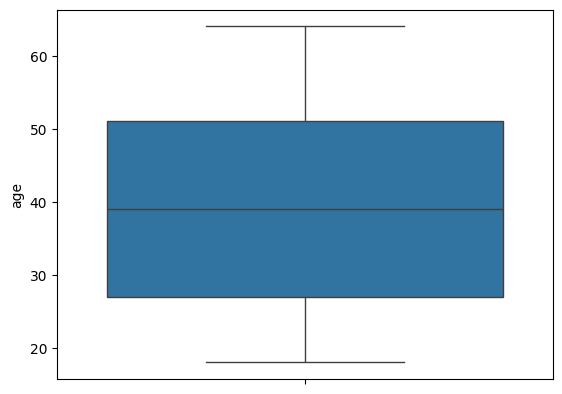

In [25]:
sns.boxplot(data = df.age)

<Axes: ylabel='bmi'>

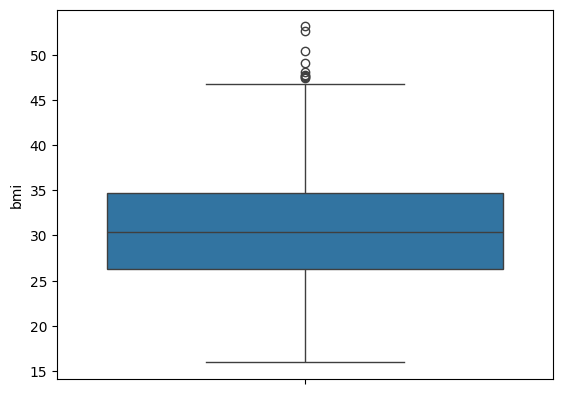

In [26]:
sns.boxplot(data = df.bmi)

<Axes: ylabel='children'>

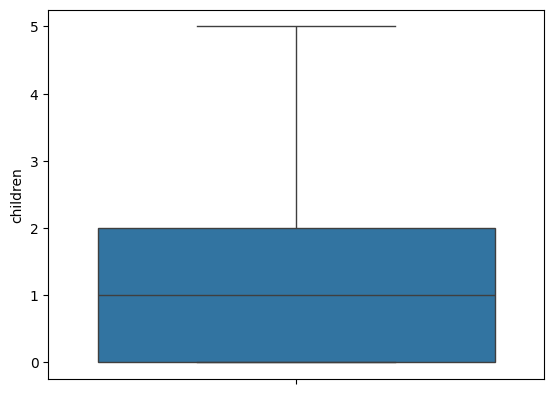

In [27]:
sns.boxplot(data = df.children)

In [28]:
dummies = pd.get_dummies(df, columns=['sex','region','smoker'])
dummies.head(3)

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.90,0,16884.9240,True,False,False,False,False,True,False,True
1,18,33.77,1,1725.5523,False,True,False,False,True,False,True,False
2,28,33.00,3,4449.4620,False,True,False,False,True,False,True,False


Since the values of categorical are less we can use label encoders. Or manual encoders 

In [29]:
# Manual Encoders

# df['sex'] = df['sex'].map({'male': 0, 'female': 1})
# df['region'] = df['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})
# df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['sex', 'region', 'smoker']:
    df[col] = label_encoder.fit_transform(df[col])

In [31]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [32]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [33]:
df.shape

(1338, 7)

In [34]:
X = df.drop(['charges'], axis='columns')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [35]:
y = df.charges 
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Use of Cross Validataion and grid Search for model selection and parameter tuning

In [36]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import ShuffleSplit 


cv = ShuffleSplit(n_splits=5, train_size=0.2, random_state=0) 


In [37]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [54]:
from xgboost import XGBRegressor

models_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1, 5, 10],
            'selection': ['random', 'cyclic']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse'],
            'max_depth': [None, 10, 20]
        }
    },
    'svr': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [1, 10],
            'epsilon': [0.1, 0.5]
        }
    }
}


In [55]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

cv = ShuffleSplit(n_splits=5, train_size=0.2, random_state=0)

best_models = []
for name, config in models_params.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=cv, scoring='r2', return_train_score=False)
    grid_search.fit(X, y)
    best_models.append({
        'model': name,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    })

import pandas as pd
print(pd.DataFrame(best_models))


               model  best_score  \
0  linear_regression    0.744542   
1              lasso    0.743261   
2      random_forest    0.834562   
3      decision_tree    0.673521   
4                svr   -0.093537   

                                         best_params  
0          {'fit_intercept': True, 'positive': True}  
1               {'alpha': 10, 'selection': 'cyclic'}  
2  {'max_depth': 20, 'min_samples_split': 10, 'n_...  
3     {'criterion': 'friedman_mse', 'max_depth': 20}  
4        {'C': 10, 'epsilon': 0.5, 'kernel': 'poly'}  


In [41]:
import sklearn 
print(sklearn.__version__)

1.6.0


In [43]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1338, 6)
y shape: (1338,)


In [56]:
best_model = RandomForestRegressor(
    max_depth=20, 
    min_samples_split=10, 
    n_estimators=100
)
best_model.fit(X, y)

RandomForestRegressor(max_depth=20, min_samples_split=10)

Testing the model by providing the custom input


In [58]:
input_data = np.array([[30, 1, 25.5, 2, 1, 2]])

In [59]:
predicted_charges = best_model.predict(input_data)
print("Predicted Insurance Charges:", predicted_charges[0])

Predicted Insurance Charges: 18804.705915865452


In [ ]:
import pickle
import os 

os.mkdir('model')

with open('model/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved successfully.")

Best model saved successfully.


In [63]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]

In [64]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [65]:
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
 

In [66]:
df1

,train acc,test acc,cvs
0,0.754785,0.734046,0.747256
1,0.761627,0.684832,0.747256
2,0.741705,0.783346,0.747256
3,0.763586,0.693974,0.747256
4,0.749785,0.754148,0.747256
5,0.760366,0.703599,0.747256
6,0.746077,0.766718,0.747256
7,0.737606,0.799396,0.747256
8,0.748898,0.753603,0.747256
9,0.745746,0.767922,0.747256


In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7417049283233981
0.7833463107364539
0.7472559473580954


In [69]:
from sklearn.metrics import r2_score

rfmodel=RandomForestRegressor(random_state=42)

rfmodel.fit(xtrain,ytrain)

ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)

print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV

estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)

print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)

print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

0.9743069932676591
0.8642010193487435
0.8359650473275293
{'n_estimators': 40}
0.9745297905469872
0.8651554682965829
0.8360394939646671


In [71]:
gbmodel=GradientBoostingRegressor()

gbmodel.fit(xtrain,ytrain)

ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)

print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV

estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)

grid.fit(xtrain,ytrain)

print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)

print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8980459663933704
0.8779936181637191
0.8539550443272989
{'learning_rate': 0.19, 'n_estimators': 21}
0.8771213796411139
0.8789196505928463
0.8604910035954794


In [73]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.116542
sex,0.000367
bmi,0.180723
children,0.007494
smoker,0.692562
region,0.002313


In [74]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.116542
bmi,0.180723
smoker,0.692562


In [75]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)

In [76]:
final_model=RandomForestRegressor(random_state=42,n_estimators=120)
final_model.fit(xtrain,ytrain)
ypredtrain2=final_model.predict(xtrain)
ypredtest2=final_model.predict(xtest)

In [77]:
from pickle import dump
dump(final_model,open('insurancemodelf.pkl','wb'))

In [78]:
new_data = pd.DataFrame({'age': 19, 'bmi': 27.9, 'children': 0, 'smoker': 1}, index=[0])
prediction = final_model.predict(new_data)
print(prediction)


[17028.86333417]
